## **IMPORTING LIBRARIES**

In [11]:
from sklearn.datasets import fetch_openml
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import confusion_matrix

## **IMPORT DATA**

In [2]:
mnist = fetch_openml('mnist_784')
x, y = mnist['data'], mnist['target']

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


## **DATA PRE-PROCESSING**

In [3]:
labels=y.to_numpy()
x=x.to_numpy()
images=x.reshape(70000,28,28,1)

## **DATA VISUALIZATION**

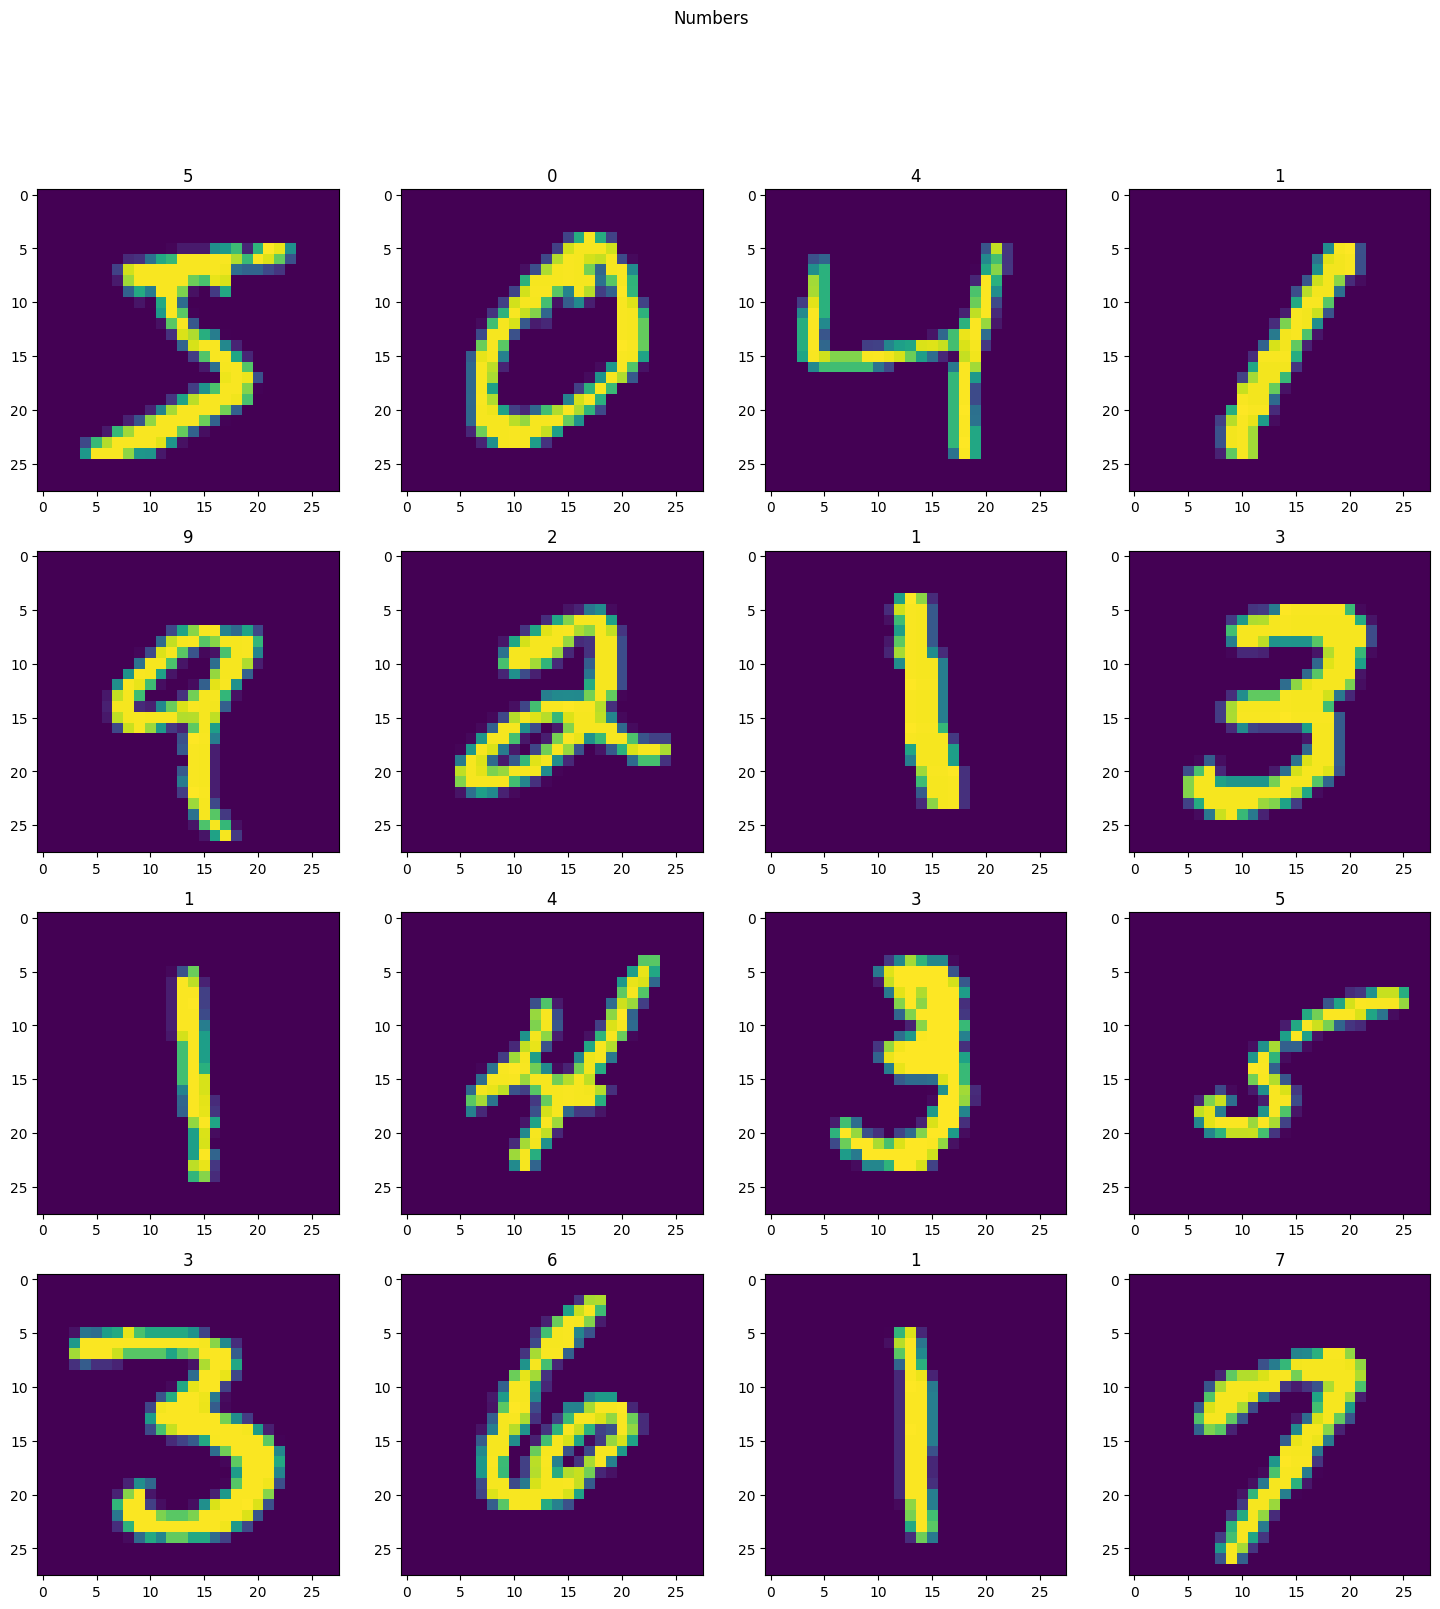

In [4]:
plt.figure(figsize=(18,18))
for i in range(16):
    plt.suptitle('Numbers')
    plt.subplot(4,4,i+1)
    plt.imshow(images[i])
    plt.title(labels[i])

## **DATA PREPROCESSING**

In [5]:
pca=PCA(n_components=50)
x_trans1=pca.fit_transform(x)

tsne=TSNE(n_components=2,n_iter=250)
x_trans2=tsne.fit_transform(x_trans1)

x_train,x_test,y_train,y_test=train_test_split(x_trans2,y,test_size=0.2)

In [6]:
x1=x_train[:,0]
x2=x_train[:,1]
x11=x_test[:,0]
x22=x_test[:,1]

## **ML ALGORITHM**

In [7]:
ml=KMeans(n_clusters=10,max_iter=300)
ml.fit(x_train)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=10)

In [ ]:
x_train1,x_test1,y_train1,y_test1=train_test_split(x,y,test_size=0.2)

In [8]:
ml2=ml=KMeans(n_clusters=10,max_iter=300)
ml2.fit(x_train1)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=10)

## **DATA VISUALIZATION  (CLUSTERING)**



**CLUSTERS OF TRAINING SET (TSNE ENABLED)**

<Axes: >

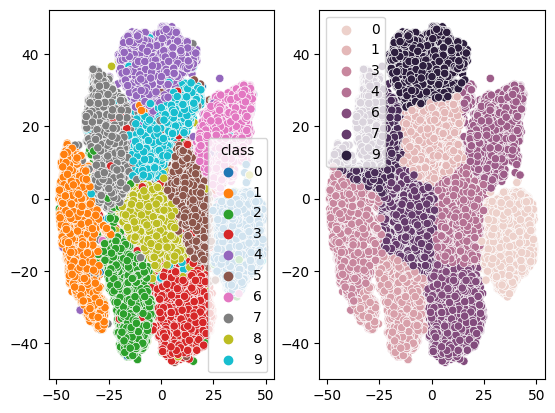

In [9]:
plt.subplot(1,2,1)
sns.scatterplot(x=x1,y=x2,hue=y_train)
plt.subplot(1,2,2)
sns.scatterplot(x=x1,y=x2,hue=ml.predict(x_train))

**CLUSTERS OF TESTING SET (TSNE ENABLED)**

<Axes: >

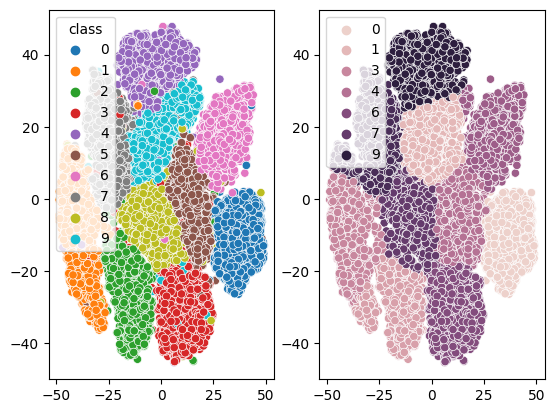

In [10]:
plt.subplot(1,2,1)
sns.scatterplot(x=x11,y=x22,hue=y_test)
plt.subplot(1,2,2)
sns.scatterplot(x=x11,y=x22,hue=ml.predict(x_test))

**CLUSTERS OF TRAINING SET (TSNE DISABLED)**

<Axes: >

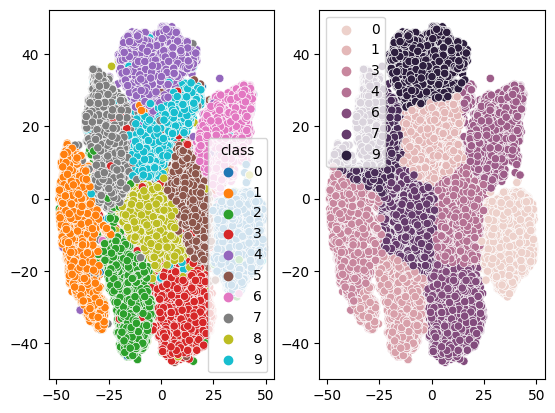

In [12]:
plt.subplot(1,2,1)
sns.scatterplot(x=x1,y=x2,hue=y_train)
plt.subplot(1,2,2)
sns.scatterplot(x=x1,y=x2,hue=ml2.predict(x_train))

**CLUSTERS OF TESTING SET (TSNE DISABLED)**

<Axes: >

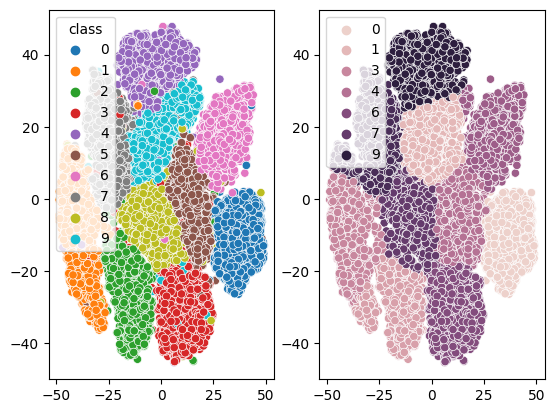

In [13]:
plt.subplot(1,2,1)
sns.scatterplot(x=x11,y=x22,hue=y_test)
plt.subplot(1,2,2)
sns.scatterplot(x=x11,y=x22,hue=ml2.predict(x_test))